Applying PCA on the MNIST dataset and using k-means clusters to classify each number (7,8,9) and it's silhouette score, and finally visualizing the representative image of each cluster.

In [6]:
# initial imports
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#gloabl variables
seed = 42

Keeping only the digits 7, 8, and 9.

In [2]:
# reading the data
X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
y_mnist = y_mnist.astype(int)
# keeping only the digits 7,8,9.
X_train = X_mnist[(y_mnist >= 7) & (y_mnist <= 9)]
y_train = y_mnist[(y_mnist >= 7) & (y_mnist <= 9)]


Transforming the data using principal component analysis (PCA) and keep only the first two components.


In [3]:
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)


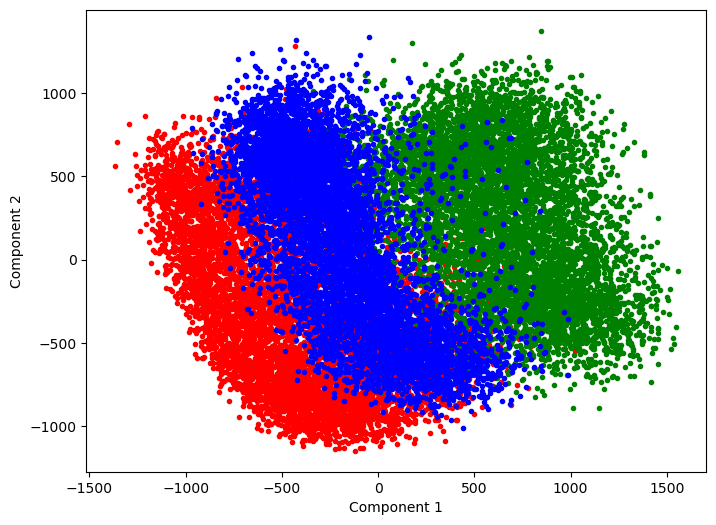

In [4]:
# visualizing the data
fig = plt.figure(figsize=(8,6))
plt.plot(X_train_pca[y_train == 7, 0], X_train_pca[y_train == 7, 1], "r.")
plt.plot(X_train_pca[y_train == 8, 0], X_train_pca[y_train == 8, 1], "g.")
plt.plot(X_train_pca[y_train == 9, 0], X_train_pca[y_train == 9, 1], "b.")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


Using the transformed data to train several K-Means clusterers with 2 to 10 clusters and calculate the silhouette score of each one.

In [7]:
# training the KMean clusterers with 2-10 clusters
krange = range(2, 10)
kmeans_list = []
for k in krange:
    kmeans = KMeans(n_clusters=k, random_state = seed)
    kmeans.fit(X_train_pca)
    kmeans_list.append(kmeans)


In [8]:
# calculating the silouette score.
silhouette_scores = [silhouette_score(X_train_pca, model.labels_) for model in kmeans_list]

In [9]:
# finding the number of clusters for the best model
best_index = np.argmax(silhouette_scores)
best_k = krange[best_index]


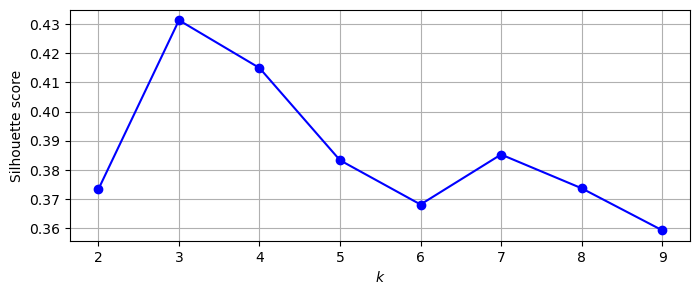

In [10]:
# ploting the silouette score
plt.figure(figsize=(8, 3))
plt.plot(krange, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()


The number of clusters that best fit the data is 3 as seen from the plot above. It also agrees with the number of digits (7,8,9)


Finding the center of each cluster and constructing a representative image of each cluser.

In [11]:
# finding the center of each cluster
centroid = kmeans_list[best_index]
centroid.cluster_centers_

array([[-512.47575398,  394.58545542],
       [-140.49012287, -537.46776742],
       [ 685.94610835,  217.2297099 ]])

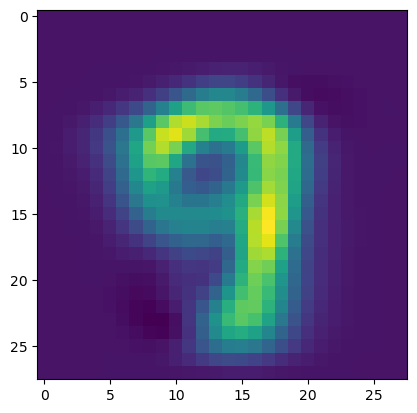

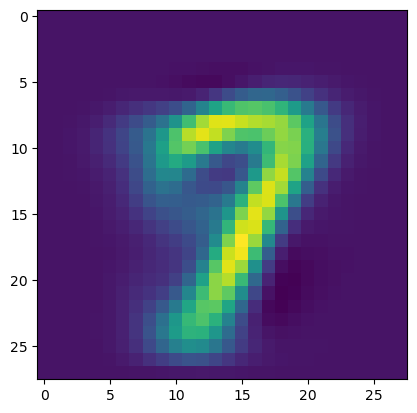

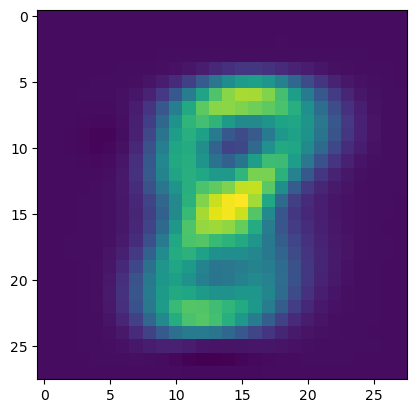

In [12]:
# constructing the image using inverse transform of the pca components
for center in centroid.cluster_centers_:
    img = pca.inverse_transform(center)
    plt.imshow(img.reshape(28,28))
    plt.show()
